# Final Project Report

* Class: DS 5100
* Student Name: Camisha Belle
* Student Net ID: fbv2ub
* This URL: https://github.com/clbelle/Monte-Carlo-Simulator_fbv2ub

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/clbelle/Monte-Carlo-Simulator_fbv2ub

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
# Monte Carlo Simulator

# The module will implement a simple Monte Carlo simulator using a set of three related classes:
# - a Die class;
# - a Game class; and 
# - an Analyzer class.

# The classes are related in the following way: Game objects are initialized with a Die object; and Analyzer objects are initialized with a Game object. [Die] → [Game] → [Analyzer]

# Set up: calls global packages and defines global variables
import numpy as np
import pandas as pd

# Die class

class DieClass():
    
    '''
    Allows the user to define a die with N sides (“faces”) and associated weights (W), that can be 
    rolled to select a face. The user also defines the number of times the die is rolled.
    
    Purpose: Provide initial input for a Monte Carlo simulator. This section replicates creation of 
    a discrete random variable associated with a stochastic process, such as using a deck of cards, 
    flipping a coin, rolling an actual die, or speaking a language.
    
    Input(s): a numpy array of the user's choice, a new weight for one side of the die being created, and
    a value for the number of times to roll the die.
    
    Output(s): A copy of a die data frame that has the sides as an index
    '''
        
    def __init__(self, sides):
                  
        '''
        Builds the die according to the user input, number of faces (sides).
        
        Purpose: Sets up the dataframe representing the user's die. Checks to ensure the die's faces
        are unique.
        
        Input(s): number of die sides (faces), new weight for one side of the die, number of times to
        roll the die
        
        Output(s): copy of the die data frame
        '''
        
        # Checks for NumPy array
        if not isinstance(sides, np.ndarray):
            raise TypeError("The input must be a NumPy array")

        # Check for unique elements within the array
        if len(sides) != len(np.unique(sides)):
            raise ValueError("The array must contain unique faces (no duplicates)")

        # Initialize the weights and private data frame
        self._data = pd.DataFrame({"face": sides, "weight": np.ones(len(sides))}).set_index("face")
        
    def set_weight(self, face, new_weight):
        
        '''
        Sets the die face weights to one then allows the user to change one of the sides
        
        Purpose: Initializes the die's weights then allows the user to change the weight of one side.
        
        Input(s): die data frame; the side of the die to change; new weight
        
        Output(s): The data frame with the new weight assigned
        '''
        
        # Make sure the selected face exists in the data frame
        if face not in self._data.index:
            raise IndexError(f"Face {face} is not valid.")

        # Ensure the new weight is numeric
        try:
            new_weight = float(new_weight)
        except ValueError:
            raise TypeError("Weight must be a numeric value.")

        # Update the weight
        self._data.at[face, "weight"] = new_weight

        
    def roll(self, num_rolls=1):
        
        '''
        Rolls the die created in the prior functions
        
        Purpose: Roll the die to generate the stochastic process.
        
        Input(s): adjusted die data frame; number of times the user will roll the die
        
        Output(s): Outcomes of the die rolls
        '''
        
        # Validate that num_rolls is an integer and positive
        if not isinstance(num_rolls, int) or num_rolls <= 0:
            raise ValueError("Number of rolls must be a positive integer.")

        # Perform weighted sampling
        outcomes = self._data.sample(n=num_rolls, weights="weight", replace=True).index.tolist()
        return outcomes

    def show(self):
        
        '''
        Sets the die face weights to one then allows the user to change one of the sides
        
        Purpose: Initializes the die's weights then allows the user to change the weight of one side.
        
        Input(s): die data frame; the side of the die to change; new weight
        
        Output(s): The data frame with the new weight assigned
        '''
        # Returns the die data frame
        return self._data.copy()

# Game class

class Game:
            
    '''
    Allows the user to generate the game values. The user indicates the number of rolls.
    
    Purpose: Allows the end user to indicate the number of rolls to generate as many dice as needed.
    
    Input(s): dataframe for the die; a value for the number of times to roll the die.
    
    Output(s): A list os dice rolls generated by the end user.
    '''
    
    def __init__(self, dice_list):
        '''
        Initializer - Initializes the game with a list of die objects created in the DieClass class above.
        
        Purpose: Initializes the game.
        
        Input(s): DieClass objects
        
        Output(s): Initialized variables
        '''
        # Dice list
        self.dice = dice_list
        # Stores the results of the game play
        self._play_results = None

    def play(self, num_rolls):
        '''
        Simulate dice rolls for the number of rolls provided.
        
        Purpose: Rolls the dice.
        
        Input(s): num_rolls - Number of times to roll the dice
        
        Output(s): Wide format data frame
        '''
        if not isinstance(num_rolls, int) or num_rolls <= 0:
            raise ValueError("Number of rolls must be a positive integer.")

        # Simulate rolls for each die
        results = {f"Die_{i}": die.roll(num_rolls) for i, die in enumerate(self.dice)}
        results["Roll_Number"] = range(1, num_rolls + 1)

        # Create a wide-format DataFrame
        self._play_results = pd.DataFrame(results).set_index("Roll_Number")

    def show(self, form="wide"):
        '''
        Purpose: Return the results of the most recent play in the specified format.
        
        Input(s): string specifying the format ('wide' or 'narrow').
        
        Output(s): A copy of the play results in the desired format.
        '''
        
        if self._play_results is None:
            raise ValueError("No results available. Please call the 'play' method first.")

        if form == "wide":
            return self._play_results.copy()
        elif form == "narrow":
            # Convert to narrow format
            narrow_df = self._play_results.reset_index().melt(
                id_vars=["Roll_Number"],
                var_name="Die_Number",
                value_name="Outcome"
            )
            return narrow_df.set_index(["Roll_Number", "Die_Number"])
        else:
            raise ValueError("Invalid format. Choose 'wide' or 'narrow'.")

# Analyzer class

class Analyzer:
            
    '''
    Determines how the dice rolls in the game class worked.
    
    Purpose: To evaluate the dice rolls generated within the Game class.
    
    Input(s): A dataframe including the roll id number, the die number, and the outcome of the rolls.
    
    Output(s): Computations of the number of results within each type of method: jackpot; face counts;
    combo count; and permutation.
    '''
    
    def __init__(self, game):
        '''
        Purpose: Initializes the Analyzer with a game object.
        
        Input(s): Game object containing the results of a game play.
        
        Output(s): Initialized variables
        '''
        if not isinstance(game, Game):
            raise ValueError("The input must be a Game object.")
        
        self.game = game
        # Pulls the results from the games module in wide format
        self._results = game.show(form="wide")  

    def jackpot(self):
        '''
        Purpose: Compute the number of jackpots (rolls where all faces are the same).
        
        Output(s): Integer count of the number of jackpots.
        '''
        # Check if all columns in a row are identical
        jackpot_count = (self._results.nunique(axis=1) == 1).sum()
        return jackpot_count

    def face_counts_per_roll(self):
        '''
        Purpose: Compute numnber of times each face appears in each roll.
        
        Output(s): dataframe with the number of rolls as the index and face counts as columns.
        '''
        # Count occurrences of each face for each roll
        face_counts = self._results.apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)
        return face_counts

    def combo_count(self):
        '''
        Computes the distinct combinations of faces rolled and their counts.
        Combinations are independent of the order.
        
        Output(s): dataframe with a multiindex of distinct combinations and a column for counts.
        '''
        # Sort each row to ensure order-independent combinations
        sorted_results = self._results.apply(lambda x: tuple(sorted(x)), axis=1)
        combo_counts = sorted_results.value_counts().to_frame("Counts")
        combo_counts.index.name = "Combination"
        return combo_counts

    def permutation_count(self):
        '''
        Purpose: Computes the distinct permutations of faces rolled and their counts. Permutations 
        are order-dependent.
        
        Output(s): dataframe with a multiindex of distinct permutations and a column for counts.
        '''
        # Treat each row as a tuple to maintain order
        permutation_counts = self._results.apply(tuple, axis=1).value_counts().to_frame("Counts")
        permutation_counts.index.name = "Permutation"
        return permutation_counts
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import unittest
import numpy as np
import pandas as pd
from MonteCarloSimulator import DieClass, Game, Analyzer

class TestDieClass(unittest.TestCase):
    def setUp(self):
        """Set up a sample die for testing."""
        self.die = DieClass(np.array(["A", "B", "C", "D"]))

    def test_die_initialization(self):
        """Test the initialization of the die."""
        self.assertEqual(len(self.die.show()), 4)  # Should have 4 sides
        self.assertTrue(all(self.die.show()["weight"] == 1))  # All weights should be 1

    def test_set_weight(self):
        """Test setting a new weight for a die face."""
        self.die.set_weight("A", 2.5)
        self.assertEqual(self.die.show().at["A", "weight"], 2.5)

    def test_set_weight_invalid_face(self):
        """Test setting a weight for an invalid face."""
        with self.assertRaises(IndexError):
            self.die.set_weight("Z", 2.5)

    def test_roll(self):
        """Test rolling the die."""
        outcomes = self.die.roll(10)
        self.assertEqual(len(outcomes), 10)
        self.assertTrue(all(face in ["A", "B", "C", "D"] for face in outcomes))

    def test_roll_invalid_input(self):
        """Test rolling the die with invalid input."""
        with self.assertRaises(ValueError):
            self.die.roll(0)

class TestGameClass(unittest.TestCase):
    def setUp(self):
        """Set up a game with multiple dice."""
        self.die1 = DieClass(np.array(["A", "B", "C"]))
        self.die2 = DieClass(np.array(["X", "Y", "Z"]))
        self.game = Game([self.die1, self.die2])

    def test_game_play(self):
        """Test playing the game."""
        self.game.play(5)
        results = self.game.show(form="wide")
        self.assertEqual(results.shape, (5, 2))  # 5 rolls, 2 dice

    def test_game_show_wide(self):
        """Test showing results in wide format."""
        self.game.play(3)
        wide_results = self.game.show(form="wide")
        self.assertEqual(wide_results.shape[0], 3)

    def test_game_show_narrow(self):
        """Test showing results in narrow format."""
        self.game.play(3)
        narrow_results = self.game.show(form="narrow")
        self.assertEqual(narrow_results.index.nlevels, 2)  # MultiIndex with Roll_Number and Die_Number

    def test_game_invalid_show_format(self):
        """Test showing results with an invalid format."""
        self.game.play(3)
        with self.assertRaises(ValueError):
            self.game.show(form="invalid")

class TestAnalyzerClass(unittest.TestCase):
    def setUp(self):
        """Set up a game and analyzer."""
        self.die1 = DieClass(np.array(["1", "2", "3"]))
        self.die2 = DieClass(np.array(["1", "2", "3"]))
        self.game = Game([self.die1, self.die2])
        self.game.play(5)
        self.analyzer = Analyzer(self.game)

    def test_analyzer_initialization(self):
        """Test analyzer initialization."""
        self.assertIsInstance(self.analyzer, Analyzer)

    def test_jackpot(self):
        """Test the jackpot calculation."""
        # All rows should be checked for identical values
        jackpot_count = self.analyzer.jackpot()
        self.assertIsInstance(jackpot_count, int)
        self.assertGreaterEqual(jackpot_count, 0)

    def test_face_counts_per_roll(self):
        """Test face counts per roll."""
        face_counts = self.analyzer.face_counts_per_roll()
        self.assertIsInstance(face_counts, pd.DataFrame)
        self.assertEqual(face_counts.shape[0], 5)  # 5 rolls

    def test_combo_count(self):
        """Test combination counts."""
        combo_counts = self.analyzer.combo_count()
        self.assertIsInstance(combo_counts, pd.DataFrame)
        self.assertGreaterEqual(len(combo_counts), 1)

    def test_permutation_count(self):
        """Test permutation counts."""
        permutation_counts = self.analyzer.permutation_count()
        self.assertIsInstance(permutation_counts, pd.DataFrame)
        self.assertGreaterEqual(len(permutation_counts), 1)

if __name__ == "__main__":
    unittest.main()
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [8]:
import MonteCarloSimulator

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(MonteCarloSimulator)

Help on module MonteCarloSimulator:

NAME
    MonteCarloSimulator - # Monte Carlo Simulator

CLASSES
    builtins.object
        Analyzer
        DieClass
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  Determines how the dice rolls in the game class worked.
     |  
     |  Purpose: To evaluate the dice rolls generated within the Game class.
     |  
     |  Input(s): A dataframe including the roll id number, the die number, and the outcome of the rolls.
     |  
     |  Output(s): Computations of the number of results within each type of method: jackpot; face counts;
     |  combo count; and permutation.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Purpose: Initializes the Analyzer with a game object.
     |      
     |      Input(s): Game object containing the results of a game play.
     |      
     |      Output(s): Initialized variables
     |  
     |  combo_count(self)
     |      Comput

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/clbelle/Monte-Carlo-Simulator_fbv2ub/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [60]:
#Fair coin
faces = np.array(["H", "T"])
die_fair = DieClass(faces)
    
#die_fair.set_weight("H", 1.0)
print("Fair Coin Die:")
print(die_fair.show())

#Unfair coin
faces = np.array(["H", "T"])
die_unfair = DieClass(faces)
    
die_unfair.set_weight("H", 5.0)
print("Unfair Coin Die:")
print(die_unfair.show())

Fair Coin Die:
      weight
face        
H        1.0
T        1.0
Unfair Coin Die:
      weight
face        
H        5.0
T        1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [61]:
# Create dice
die1 = DieClass(np.array(["H", "T"]))
die2 = DieClass(np.array(["H", "T"]))

# Create and play the game
game1 = Game([die1, die2])
game1.play(1000)

# Show results in wide format
#print("Results in wide format:")
#print(game1.show(form="wide"))

# Show results in narrow format
#print("\nResults in narrow format:")
#print(game1.show(form="narrow"))

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [71]:
# Create dice
die3 = DieClass(np.array(["H", "T"]))
die4 = DieClass(np.array(["H", "T"]))

die4.set_weight("H", 5.0)

game2 = Game([die3, die4, die4])
game2.play(1000)

# Show results in wide format
#print("Results in wide format:")
#print(game2.show(form="wide"))

# Show results in narrow format
#print("\nResults in narrow format:")
#print(game2.show(form="narrow"))

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [72]:
analyzer1 = Analyzer(game1)
print("Jackpots game 1:", analyzer1.jackpot())

analyzer2 = Analyzer(game2)
print("Jackpots game 2:", analyzer2.jackpot())

Jackpots game 1: 1514
Jackpots game 2: 1627


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [73]:
analyzer1 = Analyzer(game1)
print("Jackpots relative frequency game 1:", analyzer1.jackpot()/2000)

analyzer2 = Analyzer(game2)
print("Jackpots relative frequency game 2:", analyzer2.jackpot()/3000)

Jackpots relative frequency game 1: 0.757
Jackpots relative frequency game 2: 0.5423333333333333


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

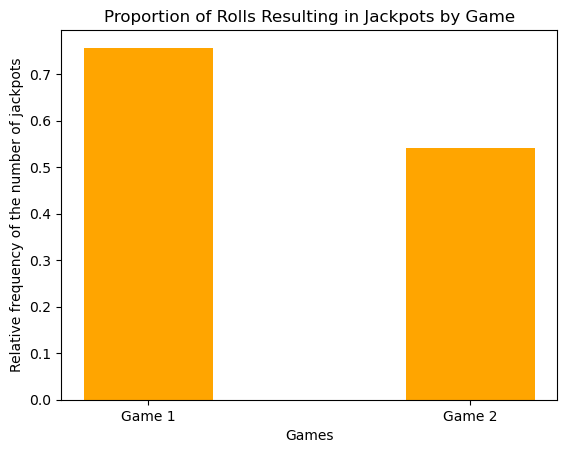

In [74]:
import matplotlib.pyplot as plt

data = {'Game 1': analyzer1.jackpot()/2000, 'Game 2': analyzer2.jackpot()/3000}
game = list(data.keys())
rel_freq = list(data.values())

fig = plt.figure()

# bar plot
plt.bar(game, rel_freq, color ='orange', 
        width = 0.4)

plt.xlabel("Games")
plt.ylabel("Relative frequency of the number of jackpots")
plt.title("Proportion of Rolls Resulting in Jackpots by Game")
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [88]:
# Create dice
die2_1 = DieClass(np.array([1, 2, 3, 4, 5, 6]))
die2_2 = DieClass(np.array([1, 2, 3, 4, 5, 6]))
die2_3 = DieClass(np.array([1, 2, 3, 4, 5, 6]))

print(die2_1.show())
print(die2_2.show())
print(die2_3.show())

      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [89]:
die2_3.set_weight(6, 5.0)

print(die2_3.show())

      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [90]:
die2_2.set_weight(1, 5.0)

print(die2_2.show())

      weight
face        
1        5.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [91]:
# Create and play the game
game2_1 = Game([die2_1, die2_1, die2_1, die2_1, die2_1])
game2_1.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [92]:
# Create and play the game
game2_2 = Game([die2_2, die2_3, die2_1, die2_1, die2_1])
game2_2.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

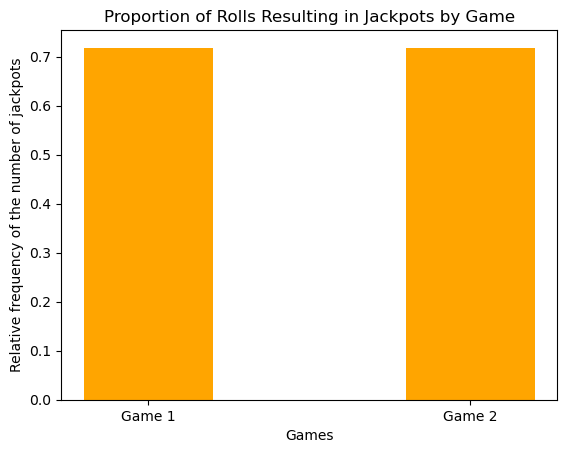

In [93]:
analyzer2_1 = Analyzer(game2_1)

analyzer2_2 = Analyzer(game2_2)

data = {'Game 1': analyzer2_1.jackpot()/50000, 'Game 2': analyzer2_2.jackpot()/50000}
game = list(data.keys())
rel_freq = list(data.values())

fig = plt.figure()

# bar plot
plt.bar(game, rel_freq, color ='orange', 
        width = 0.4)

plt.xlabel("Games")
plt.ylabel("Relative frequency of the number of jackpots")
plt.title("Proportion of Rolls Resulting in Jackpots by Game")
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [115]:
# Open file
data = pd.read_csv('english_letters.txt',delim_whitespace=True, header=None)
data.columns = ['letter','weight']
#print(data)

letters = data.iloc[:, 0].to_numpy()
weights = data.iloc[:, 1].to_numpy()
#print(letters)
#print(weights)

die3_1 = DieClass(letters)

for i in range(len(weights)):
    die3_1.set_weight(letters[i], weights[i])
    
#print(die3_1.show())

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [119]:
game3_1 = Game([die3_1, die3_1, die3_1, die3_1])
game3_1.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [130]:
data = pd.read_csv('scrabble_words.txt')
words = data.iloc[:, 0].to_numpy()

analyzer3_1 = Analyzer(game3_1)

permutation_counts = analyzer3_1.permutation_count()

valid_word_count = 0
for perm in permutation_counts.index:
    word = ''.join(perm).lower()
    if word in words:
        valid_word_count += permutation_counts.loc[perm, 'Counts']
return valid_word_count

print(f"Number of valid English word permutations: {valid_word_count}")

SyntaxError: 'return' outside function (2058046118.py, line 13)

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [131]:
game3_2 = Game([die3_1, die3_1, die3_1, die3_1, die3_1])
game3_2.play(1000)

analyzer3_2 = Analyzer(game3_2)

permutation_counts = analyzer3_2.permutation_count()

valid_word_count = 0
for perm in permutation_counts.index:
    word = ''.join(perm).lower()
    if word in words:
        valid_word_count += permutation_counts.loc[perm, 'Counts']
return valid_word_count

print(f"Number of valid English word permutations: {valid_word_count}")

SyntaxError: 'return' outside function (2618893657.py, line 13)